In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('adult.csv')

In [3]:
print(df.head(10))

   age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.

SyntaxError: invalid syntax (791285630.py, line 1)

In [ ]:
df.nunique()

In [ ]:
df.describe().T

In [6]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

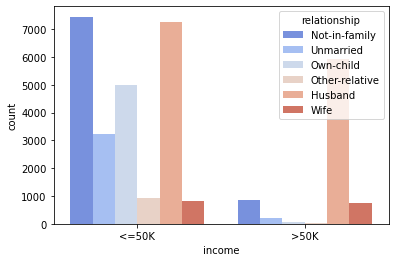

In [7]:
sns.countplot(df['income'],palette='coolwarm',hue='relationship',data=df)

In [8]:
#replace the ? value with mode

In [9]:
df['workclass'].valuecounts()

AttributeError: 'Series' object has no attribute 'valuecounts'

In [10]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df['workclass']=df['workclass'].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-specialty')
df['native.country']=df['native.country'].replace('?','United-States')

In [12]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [14]:
#Feature Enginering

In [15]:
#education category

In [16]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [17]:
df.education=df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education=df.education.replace('HS-grad','high school')
df.education=df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df.education=df.education.replace('Bachelors','undergrad')
df.education=df.education.replace('Masters','grad')
df.education=df.education.replace('Doctorate','doc')


In [18]:
#martial_status

In [19]:
df['marital-status'].value_counts()

KeyError: 'marital-status'

In [20]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [22]:
df['marital.status']= df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital.status']= df['marital.status'].replace(['Never-married'], 'not-married')
df['marital.status']= df['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [23]:
df.income = df.income.replace('<=50K', 0)
df.income = df.income.replace('>50K', 1)

In [25]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,high school,9,other,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,high school,9,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,higher,10,other,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,school,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,higher,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,high school,9,other,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,school,6,other,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,doc,16,not-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,high school,9,other,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,higher,10,not-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


In [26]:
df.corr

<bound method DataFrame.corr of        age workclass  fnlwgt    education  education.num marital.status  \
0       90   Private   77053  high school              9          other   
1       82   Private  132870  high school              9          other   
2       66   Private  186061       higher             10          other   
3       54   Private  140359       school              4          other   
4       41   Private  264663       higher             10          other   
...    ...       ...     ...          ...            ...            ...   
32556   22   Private  310152       higher             10    not-married   
32557   27   Private  257302       higher             12        married   
32558   40   Private  154374  high school              9        married   
32559   58   Private  151910  high school              9          other   
32560   22   Private  201490  high school              9    not-married   

              occupation   relationship   race     sex  capital.gai

In [27]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


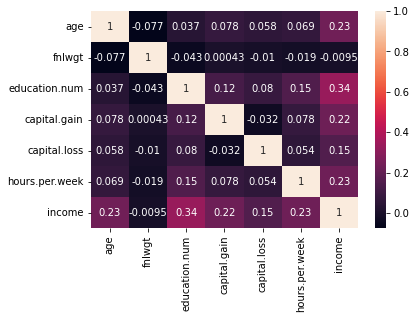

In [28]:
sns.heatmap(df.corr(), annot=True);

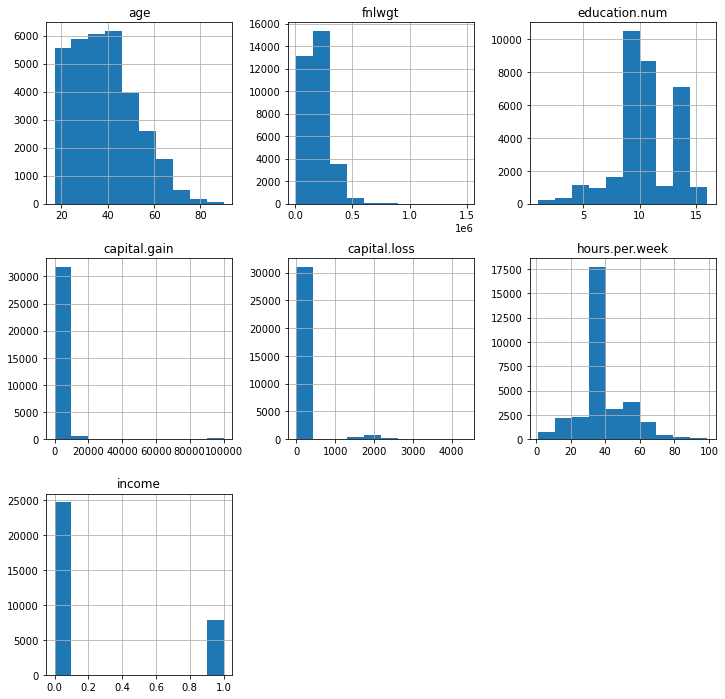

In [29]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

In [30]:
X= df.drop(['income'],axis=1)

In [31]:
y=df['income']

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [33]:
df1=df.copy()

In [35]:
df1=df1.apply(LabelEncoder().fit_transform)
df1.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,2,8,2,9,1,4,0,0,91,39,38,0
1,65,3,6514,2,8,2,3,1,4,0,0,91,17,38,0
2,49,3,11175,3,9,2,9,4,2,0,0,91,39,38,0
3,37,3,7009,4,3,2,6,4,4,0,0,90,39,38,0
4,24,3,16850,3,9,2,9,3,4,0,0,90,39,38,0
5,17,3,14182,2,8,2,7,4,4,0,0,89,44,38,0
6,21,3,7800,4,5,2,0,4,4,1,0,89,39,38,0
7,57,6,3183,0,15,1,9,2,4,0,0,88,19,38,1
8,51,0,20872,2,8,2,9,1,4,0,0,88,39,38,0
9,24,3,2360,3,9,1,2,4,4,1,0,87,59,38,1


In [36]:
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [37]:
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [39]:
X


array([[ 3.69773323, -0.08529633, -1.29774315, ...,  8.84477866,
        -0.03112174,  0.26136999],
       [ 3.18435957, -0.08529633, -0.65878188, ...,  8.84477866,
        -1.8427429 ,  0.26136999],
       [ 2.01093406, -0.08529633,  0.111774  , ...,  8.84477866,
        -0.03112174,  0.26136999],
       ...,
       [ 0.10411759, -0.08529633, -0.39989097, ..., -0.20417671,
        -0.03112174,  0.26136999],
       [ 1.4242213 , -0.08529633, -0.43245899, ..., -0.20417671,
        -0.03112174,  0.26136999],
       [-1.21598611, -0.08529633,  0.39380969, ..., -0.20417671,
        -1.67805007,  0.26136999]])

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.839
Acc on test data: 0.836
